In [1]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [2]:
!apt-get install -y antiword

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (197 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import os
import textract
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.chdir('/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/Peoplesoft resumes')
!ls

'Peoplesoft Admin_AnubhavSingh.docx'
'Peoplesoft Admin_G Ananda Rayudu.doc'
'Peoplesoft Admin_Gangareddy.doc'
'Peoplesoft Admin_Murali.docx'
'Peoplesoft Admin_Priyanka Ramadoss.doc'
'Peoplesoft Admin_SirazuddinMohammad.docx'
'Peoplesoft Admin_srinivasarao.doc'
'Peoplesoft Admin_Varkala Vikas.docx'
'Peoplesoft Admin_Vinod Akkala.doc'
'PeopleSoft DBA_Ganesh Alladi.doc'
'PeopleSoft DBA_Vivekanand Sayana.docx'
'Peoplesoft Finance_Arun Venu.doc'
'Peoplesoft Finance_Pritam Biswas.doc'
'Peoplesoft Finance_Rahul Ahuja.doc'
'Peoplesoft FSCM_HariNarayana.docx'
'Peoplesoft FSCM_Murali.docx'
'Peoplesoft FSCM_PriyabrataHota.docx'
'Peoplesoft FSCM_R Ahmed.doc'
'Peoplesoft FSCM_SUJATHA.docx'
'Resume_Subha Santosh_Peoplesoft FSCM.docx'


In [6]:
file_path = []
category = []
directory = '/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/Peoplesoft resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    file_full_path = os.path.join(directory,i)
    file_path.append((textract.process(file_full_path)).decode('utf-8'))
    category.append('Peoplesoft')

In [7]:
file_path, category

(['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMan

In [8]:
import os
os.chdir('/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/React Deveolper')
!ls

'React Developer_Deepakreddy.docx'
'React Developer_Haripriya.docx'
'React Developer_Kamalakar Reddy.docx'
'React Developer_Naveen sadhu.docx'
'React Developer_PavasGoswami.doc'
'React Developer_Pragnya.docx'
'React Developer_Sarala Madasu-converted.docx'
'React Developer_Thirupathiamma.docx'
'React Developer_Vinay Reddy.doc'
'React Dev_Krishna Kanth.docx'
'React Dev_Krishna Kanth_Musquare Technologies.docx'
'React JS Developer_AnjaniPriyadarshini.doc'
'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx'
'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx'
'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx'
'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx'
'Reactjs Developer_M Lokesh.docx'
'Reactjs Developer_Prabakaran_Musquare Technologies.docx'
'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx'
'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx'
'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx'
'R

In [9]:
file_path1 = []
category1 = []
directory1 = '/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/React Deveolper'
for i in os.listdir(directory1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    file_full_path1 = os.path.join(directory1,i)
    file_path1.append((textract.process(file_full_path1)).decode('utf-8'))
    category1.append('React Deveolper')

In [10]:
file_path1, category1 

(['MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI

In [11]:
import os
os.chdir('/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/SQL Developer Lightning insight')
!ls

'Anil kumar.docx'	      'Priyanka L.doc'
'AradhanaTripathi[4_0].docx'  'PSyamKumar[2_3].docx'
'Buddha Vamsi.docx'	      'Rajupavanakumari[2_10].docx'
 kamballapradeep.docx	      'Ramalakshmi K.docx'
'Nazeer Basha.doc'	      'RameshNataru[3_4].docx'
'Neeraj Mishra.docx'	      'Tatikonda Kiran Kumar.doc'
 premsai.docx		      'Vinod B.docx'


In [12]:
file_path2 = []
category2 = []
directory2 = '/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    file_full_path2 = os.path.join(directory2,i)
    file_path2.append((textract.process(file_full_path2)).decode('utf-8'))
    category2.append('SQL Developer Lightning insight')

In [13]:
file_path2, category2

(['SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOPER\n\nB. vinod kumar\n\n\n\nOBJECTIVE:\n\nWilling to work under a challenging and professional environment with exposure to new technologies as an SQL and MSBI developer in the area of SQL SERVER 2014, 2016 with Enterprise Portal and where there is a scope for Organizational growth as well as individual growth.\n\nProfessional summary:\n\n\t\tHaving around 2.2Years of IT Experience in Microsoft Business Intelligence (MSBI) under SQL server environment, with through knowledge of SQL server 2014,2016 databases.\n\n\t\tExtensive experience on Joins, Set Operators, Table Variables, Temporary Tables, CTE & Sub Queries.\n\n\t\tGood experience in writing Simple and sample SQL queries.\n\n\t\tExperience in Developing Stored Procedures and User defined functions.\n\n\t\tHands on Experience Triggers , views, cursor and synonyms.\n\n\t\tExperience on Writing SQL using joins, sub queries.\n\n\t\tGood at generating multiple reports using SSRS from SQ

In [14]:
import os
os.chdir('/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/Workday Resumes')
!ls

 ChinnaSubbarayuduM_Hexaware.docx     'Punugoti Swetha_Hexaware.doc'
 dt.pkl				      'P V Sai Krishna_ Hexaware.docx'
'Gopi Krishna_Hexaware.docx'	       RahulM_Hexaware.docx
'Harikrishna Akula_Hexaware.doc'       RameshP_Hexaware.docx
'Hari Krishna M_Hexaware.doc'	       Resume.csv
'Himaja G_(Hexaware).docx'	       Resume.gsheet
'Hima Mendu_Hexaware.doc'	       ShireeshKumar_Hexaware.doc
'J. Sumanth Royal_Hexaware.doc'        Srikanth-Hexaware.docx
 Jyotiverma_Heaware.docx	      'Sri Krishna S_Hexaware.doc'
'Madeeswar A_Hexaware.doc'	       SSKumar_Hexaware.docx
 MooraboyinaGuravaiah_Hexaware.docx   'Venkateswarlu B_Hexaware.doc'
'Naresh Babu Cherukuri_Hexaware.doc'  'Vinay Kumar_Hexaware.docx'


In [15]:
file_path3 = []
category3 = []
directory3 = '/content/gdrive/MyDrive/DA AND DS/DS/PROJECT_2/Resumes/Workday Resumes'
for i in os.listdir(directory2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    file_full_path3 = os.path.join(directory2,i)
    file_path3.append((textract.process(file_full_path2)).decode('utf-8'))
    category3.append('Workday Resumes')

In [16]:
data1 = pd.DataFrame(data=file_path, columns=['Resumes'])
data1['category'] = category

In [17]:
data1.head()

,Resumes,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft
2,\n|Personal Details ...,Peoplesoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
4,\n PeopleSoft Database Ad...,Peoplesoft


In [18]:
data1.tail()

,Resumes,category
15,\n PeopleSoft Admin/Peo...,Peoplesoft
16,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,Peoplesoft
17,Classification: Internal\n\nClassification: In...,Peoplesoft
18,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
19,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",Peoplesoft


In [19]:
data2 = pd.DataFrame(data=file_path1, columns=['Resumes'])
data2['category1'] = category1
data2.head()

,Resumes,category1
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Deveolper
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Deveolper
2,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React Deveolper
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React Deveolper
4,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React Deveolper


In [20]:
data2.tail()

,Resumes,category1
17,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React Deveolper
18,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Deveolper
19,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Deveolper
20,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React Deveolper
21,Name: M. Prabakaran\n\nTitle: UI Developer\n\n...,React Deveolper


In [21]:
data3 = pd.DataFrame(data=file_path2, columns=['Resumes'])
data3['category2'] = category2
data3.head()

,Resumes,category2
0,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning insight
1,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning insight
2,\n SQL S...,SQL Developer Lightning insight
3,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning insight
4,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight


In [22]:
data3.tail()

,Resumes,category2
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning insight
10,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
11,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning insight
12,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning insight
13,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight


In [23]:
data4 = pd.DataFrame(data=file_path3, columns=['Resumes'])
data4['category3'] = category3
data4.head()

,Resumes,category3
0,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
1,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
2,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
3,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
4,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


In [24]:
data4.tail()

,Resumes,category3
9,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
10,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
11,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
12,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
13,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


In [25]:
data = data1.append([data2, data3, data4], ignore_index = True)
data.head()

,Resumes,category,category1,category2,category3
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft,NaN,NaN,NaN
2,\n|Personal Details ...,Peoplesoft,NaN,NaN,NaN
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN
4,\n PeopleSoft Database Ad...,Peoplesoft,NaN,NaN,NaN


In [26]:
data.tail(5)

,Resumes,category,category1,category2,category3
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes


In [27]:
data['Category'] = category + category1 + category2 + category3
data.head()

,Resumes,category,category1,category2,category3,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,\n|Personal Details ...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,\n PeopleSoft Database Ad...,Peoplesoft,NaN,NaN,NaN,Peoplesoft


In [28]:
data.tail()

,Resumes,category,category1,category2,category3,Category
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [29]:
data.drop(['category', 'category1', 'category2', 'category3'], axis = 1, inplace = True)
data.head()

,Resumes,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft
2,\n|Personal Details ...,Peoplesoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
4,\n PeopleSoft Database Ad...,Peoplesoft


In [30]:
data.tail()

,Resumes,Category
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


In [31]:
data.to_csv('Resume.csv', index=False)

In [32]:
data.head()

,Resumes,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft
2,\n|Personal Details ...,Peoplesoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
4,\n PeopleSoft Database Ad...,Peoplesoft


In [33]:
data.tail()

,Resumes,Category
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [35]:
data = pd.read_csv('Resume.csv')
data.head()

,Resumes,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,Peoplesoft
2,\n|Personal Details ...,Peoplesoft
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
4,\n PeopleSoft Database Ad...,Peoplesoft


In [36]:
data.tail()

,Resumes,Category
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


### EDA

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   70 non-null     object
 1   Category  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [39]:
data.duplicated().sum()

13

### Checking unnecessary words in the Data

In [40]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.9
True     0.1
Name: Resumes, dtype: float64

In [41]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.957143
True     0.042857
Name: Resumes, dtype: float64

In [42]:
print('Total Resumes this period:', len(data.index), '\n')

Total Resumes this period: 70 



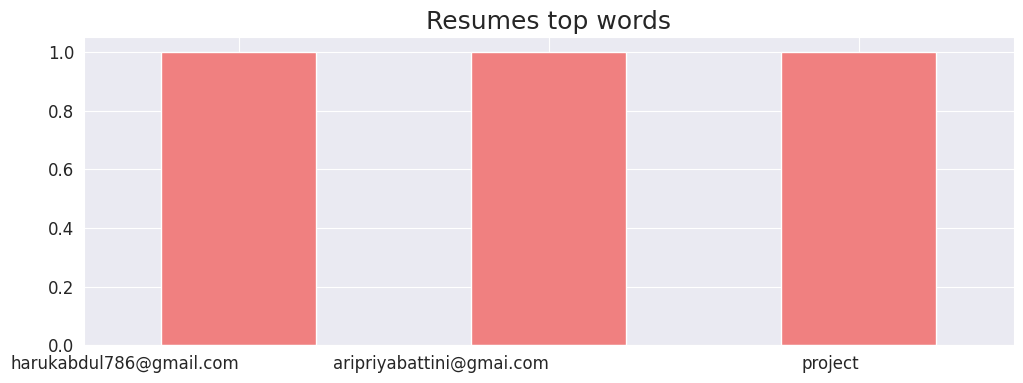

In [43]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(12, 4), fontsize=12, color='lightcoral'
)
plt.gca().set_title('Resumes top words', fontsize=18)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=0, ha='right', fontsize=12)
pass


In [44]:
category = data['Category'].value_counts().reset_index()
category

,index,Category
0,React Deveolper,22
1,Peoplesoft,20
2,SQL Developer Lightning insight,14
3,Workday Resumes,14


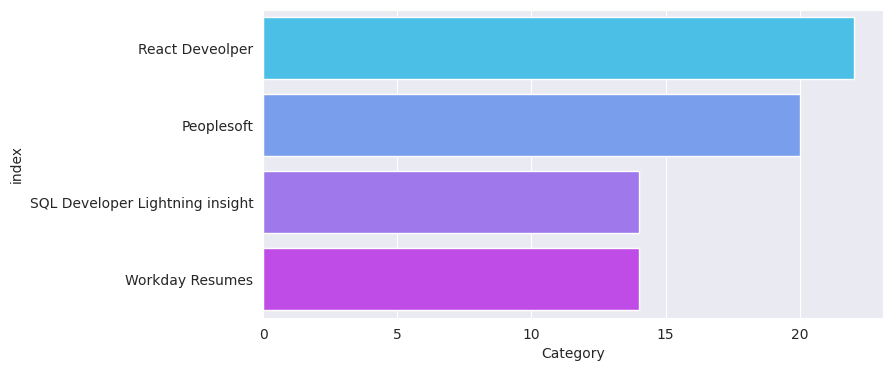

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

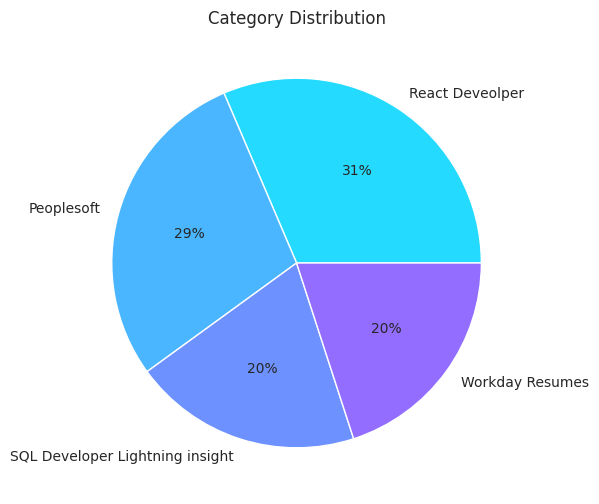

In [46]:
plt.figure(figsize=(6,6))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [47]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)

In [48]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMana

### Tokenization

In [49]:
review_text=' '.join(data)
review_text[:1000]


'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [50]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', ':', 'Scripting', ':', 'Shell', 'Scripting', 'Application', ':', 'PeopleSoft', 'HCM', ',', 'FINANCIALS', 'Operating', 'System', ':', 'Linux', ',', 'Windows', 'Web', '/', 'App', 'Servers', ':', 'Weblogic', ',', 'Tuxedo', 'RDBMS', ':', 'Oracle', 'Repository', ':', 'Github', 'Core', 'Competencies', ':', 'Scripting', ':', 'Shell', 'Scripting', 'Application', ':', 'PeopleSoft', 'HCM', ',', 'FINANCIALS', 'Operating', 'System', ':', 'Linux', ',', 'Windows', 'Web', '/', 'App', 'Servers', ':', 'Weblogic', ',', 'Tuxedo', 'RDBMS', ':', 'Oracle', 'Repository', ':', 'Github', 'To', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steady-paced', 'professional', 'growth', '.', 'Professional', 'Experience', '06/2019', '-', 'Current']


In [51]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'Anubhav Kumar Singh Core Competencies : Scripting : Shell Scripting Application : PeopleSoft HCM , FINANCIALS Operating System : Linux , Windows Web / App Servers : Weblogic , Tuxedo RDBMS : Oracle Repository : Github Core Competencies : Scripting : Shell Scripting Application : PeopleSoft HCM , FINANCIALS Operating System : Linux , Windows Web / App Servers : Weblogic , Tuxedo RDBMS : Oracle Repository : Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steady-paced professional growth . Professional Experience 06/2019 - Current HCL Current Role : System Admin Offshore Skills : Shell Scripting , Linux , PeopleSoft Administration , Github Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS . Involved in Day to Day activities such as Project Migration , Database Refresh , System admin changes , Tax updates etc .

### Remove Punchuation From Text

In [52]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Anubhav Kumar Singh Core Competencies  Scripting  Shell Scripting Application  PeopleSoft HCM  FINANCIALS Operating System  Linux  Windows Web  App Servers  Weblogic  Tuxedo RDBMS  Oracle Repository  Github Core Competencies  Scripting  Shell Scripting Application  PeopleSoft HCM  FINANCIALS Operating System  Linux  Windows Web  App Servers  Weblogic  Tuxedo RDBMS  Oracle Repository  Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steadypaced professional growth  Professional Experience 062019  Current HCL Current Role  System Admin Offshore Skills  Shell Scripting  Linux  PeopleSoft Administration  Github Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS  Involved in Day to Day activities such as Project Migration  Database Refresh  System admin changes  Tax updates etc  Troubleshooting of various servers 

### Remove URL'S from Text

In [53]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Anubhav Kumar Singh Core Competencies  Scripting  Shell Scripting Application  PeopleSoft HCM  FINANCIALS Operating System  Linux  Windows Web  App Servers  Weblogic  Tuxedo RDBMS  Oracle Repository  Github Core Competencies  Scripting  Shell Scripting Application  PeopleSoft HCM  FINANCIALS Operating System  Linux  Windows Web  App Servers  Weblogic  Tuxedo RDBMS  Oracle Repository  Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steadypaced professional growth  Professional Experience 062019  Current HCL Current Role  System Admin Offshore Skills  Shell Scripting  Linux  PeopleSoft Administration  Github Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS  Involved in Day to Day activities such as Project Migration  Database Refresh  System admin changes  Tax updates etc  Troubleshooting of various servers 

### Apply Tokenization on 100 Words

In [54]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', 'Scripting', 'Shell', 'Scripting', 'Application', 'PeopleSoft', 'HCM', 'FINANCIALS', 'Operating', 'System', 'Linux', 'Windows', 'Web', 'App', 'Servers', 'Weblogic', 'Tuxedo', 'RDBMS', 'Oracle', 'Repository', 'Github', 'Core', 'Competencies', 'Scripting', 'Shell', 'Scripting', 'Application', 'PeopleSoft', 'HCM', 'FINANCIALS', 'Operating', 'System', 'Linux', 'Windows', 'Web', 'App', 'Servers', 'Weblogic', 'Tuxedo', 'RDBMS', 'Oracle', 'Repository', 'Github', 'To', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steadypaced', 'professional', 'growth', 'Professional', 'Experience', '062019', 'Current', 'HCL', 'Current', 'Role', 'System', 'Admin', 'Offshore', 'Skills', 'Shell', 'Scripting', 'Linux', 'PeopleSoft', 'Administration', 'Github', 'Managing', 'PeopleSoft', 'HCM', 'and', 'PeopleSof

In [55]:
len(text_tokens)

46899

### Removing Stopwords

In [56]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', 'Scripting', 'Shell', 'Scripting', 'Application', 'PeopleSoft', 'HCM', 'FINANCIALS', 'Operating', 'System', 'Linux', 'Windows', 'Web', 'App', 'Servers', 'Weblogic', 'Tuxedo', 'RDBMS', 'Oracle', 'Repository', 'Github', 'Core', 'Competencies', 'Scripting', 'Shell', 'Scripting', 'Application', 'PeopleSoft', 'HCM', 'FINANCIALS', 'Operating', 'System', 'Linux', 'Windows', 'Web', 'App', 'Servers', 'Weblogic', 'Tuxedo', 'RDBMS', 'Oracle', 'Repository', 'Github', 'To', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steadypaced', 'professional', 'growth', 'Professional', 'Experience', '062019', 'Current', 'HCL', 'Current', 'Role', 'System', 'Admin', 'Offshore', 'Skills', 'Shell', 'Scripting', 'Linux', 'PeopleSoft', 'Administration', 'Github', 'Managing', 'PeopleSoft', 'HCM', 'PeopleSoft', 'FSCM', 'production', 'environments', 'along', 'support', 'e

In [57]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'to', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steadypaced', 'professional', 'growth', 'professional', 'experience', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'managing', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'e

### Applying Stemming

In [58]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'compet', 'script', 'shell', 'script', 'applic', 'peoplesoft', 'hcm', 'financi', 'oper', 'system', 'linux', 'window', 'web', 'app', 'server', 'weblog', 'tuxedo', 'rdbm', 'oracl', 'repositori', 'github', 'core', 'compet', 'script', 'shell', 'script', 'applic', 'peoplesoft', 'hcm', 'financi', 'oper', 'system', 'linux', 'window', 'web', 'app', 'server', 'weblog', 'tuxedo', 'rdbm', 'oracl', 'repositori', 'github', 'to', 'work', 'global', 'competit', 'environ', 'challeng', 'assign', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfact', 'steadypac', 'profession', 'growth', 'profession', 'experi', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshor', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administr', 'github', 'manag', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'product', 'environ', 'along', 'support', 'environ', 'instal', 'linux', 'window', 'os', 'involv', 'day', 'day', 'activ', 'project', 'migrat']


In [59]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github to work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steadypaced professional growth professional experience 062019 current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows os involved day day activities project migration


### Applying Lemmatization

In [60]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['anubhav', 'kumar', 'singh', 'core', 'competency', 'script', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financial', 'operate', 'system', 'linux', 'windows', 'web', 'app', 'server', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competency', 'script', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financial', 'operate', 'system', 'linux', 'windows', 'web', 'app', 'server', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'to', 'work', 'globally', 'competitive', 'environment', 'challenge', 'assignment', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfaction', 'steadypace', 'professional', 'growth', 'professional', 'experience', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administration', 'github', 'manage', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environment', 'along', 'support', 'environment', 'instal', 'linux'

In [61]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'anubhav kumar singh core competency script shell scripting application peoplesoft hcm financial operate system linux windows web app server weblogic tuxedo rdbms oracle repository github core competency script shell scripting application peoplesoft hcm financial operate system linux windows web app server weblogic tuxedo rdbms oracle repository github to work globally competitive environment challenge assignment shall yield twin benefit job satisfaction steadypace professional growth professional experience 062019 current hcl current role system admin offshore skill shell script linux peoplesoft administration github manage peoplesoft hcm peoplesoft fscm production environment along support environment instal linux windows os involve day day activity project migration database refresh system admin change tax update etc troubleshoot various server like application server web servers process scheduler server apply tuxedo weblogic middleware cpu patch various application work shell scrip

### Applying Text Processing On DataFrame

In [62]:
data = pd.read_csv('Resume.csv' ,encoding='latin-1')
data.tail()

,Resumes,Category
65,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
66,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
67,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
68,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes
69,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Workday Resumes


In [63]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

### Converting Into Clean Resume

In [64]:
data['Cleaned_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...
2,\n|Personal Details ...,Peoplesoft,\n|Personal Details ...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
4,\n PeopleSoft Database Ad...,Peoplesoft,\n PeopleSoft Database Ad...
5,\n PEOPLESOFT Adminis...,Peoplesoft,\n PEOPLESOFT Adminis...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,\nRahul Ahuja\n-------------------------------...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...


### Remove Url from Clean_Resumes

In [65]:
Clean_Data_set = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Cleaned_Resumes.split() if 'http' not in word]
    Clean_Data_set.append(' '.join(words_without_links))

data['Cleaned_Resumes'] = Clean_Data_set
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Anubhav Kumar Singh Core Competencies: Scripti...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,Profile Summary: â¢ 7+ years of experience in...
2,\n|Personal Details ...,Peoplesoft,|Personal Details | |Name |Pritam Biswas | |Da...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,PeopleSoft Administration Vivekanand Sayana Ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...
5,\n PEOPLESOFT Adminis...,Peoplesoft,PEOPLESOFT Administrator SRINIVAS.K Experience...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,Rahul Ahuja ----------------------------------...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, Na..."
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,Arun Venu EXPERIENCE SUMMARY â¢ Experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challenging ...


# Remove '!' from Clean_Resumes

In [66]:
data = data[data['Cleaned_Resumes']!='']
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Anubhav Kumar Singh Core Competencies: Scripti...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,Profile Summary: â¢ 7+ years of experience in...
2,\n|Personal Details ...,Peoplesoft,|Personal Details | |Name |Pritam Biswas | |Da...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,PeopleSoft Administration Vivekanand Sayana Ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...
5,\n PEOPLESOFT Adminis...,Peoplesoft,PEOPLESOFT Administrator SRINIVAS.K Experience...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,Rahul Ahuja ----------------------------------...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, Na..."
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,Arun Venu EXPERIENCE SUMMARY â¢ Experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challenging ...


# Removing Duplicate Resumes

In [67]:
data.drop_duplicates(subset=['Cleaned_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Anubhav Kumar Singh Core Competencies: Scripti...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,Profile Summary: â¢ 7+ years of experience in...
2,\n|Personal Details ...,Peoplesoft,|Personal Details | |Name |Pritam Biswas | |Da...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,PeopleSoft Administration Vivekanand Sayana Ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...
5,\n PEOPLESOFT Adminis...,Peoplesoft,PEOPLESOFT Administrator SRINIVAS.K Experience...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,Rahul Ahuja ----------------------------------...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, Na..."
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,Arun Venu EXPERIENCE SUMMARY â¢ Experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challenging ...


In [68]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Anubhav Kumar Singh Core Competencies: Scripti...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,Profile Summary: â¢ 7+ years of experience in...
2,\n|Personal Details ...,Peoplesoft,|Personal Details | |Name |Pritam Biswas | |Da...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,PeopleSoft Administration Vivekanand Sayana Ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,PeopleSoft Database Administrator Gangareddy P...
5,\n PEOPLESOFT Adminis...,Peoplesoft,PEOPLESOFT Administrator SRINIVAS.K Experience...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,Rahul Ahuja ----------------------------------...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,"C O N T A C T : Address: Manyata Tech Park, Na..."
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,Arun Venu EXPERIENCE SUMMARY â¢ Experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,Tanna Sujatha OBJECTIVE Seeking a challenging ...


# Cleaning Words From Text

In [69]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [70]:
data['Cleaned_Resumes'] = data['Cleaned_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,profile summary â¢ years of experience in im...
2,\n|Personal Details ...,Peoplesoft,personal details name pritam biswas date of ...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,peoplesoft administration vivekanand sayana ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,peoplesoft database administrator gangareddy p...
5,\n PEOPLESOFT Adminis...,Peoplesoft,peoplesoft administrator srinivask experience ...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,rahul ahuja summary â¢ years of experience...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,c o n t a c t address manyata tech park nagav...
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,arun venu experience summary â¢ experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,tanna sujatha objective seeking a challenging ...


# Removing Emoji from Clean_Resumes

In [71]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [72]:
data['Cleaned_Resumes']=data['Cleaned_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Category,Cleaned_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,profile summary â¢ years of experience in im...
2,\n|Personal Details ...,Peoplesoft,personal details name pritam biswas date of ...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,peoplesoft administration vivekanand sayana ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,peoplesoft database administrator gangareddy p...
5,\n PEOPLESOFT Adminis...,Peoplesoft,peoplesoft administrator srinivask experience ...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,rahul ahuja summary â¢ years of experience...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,c o n t a c t address manyata tech park nagav...
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,arun venu experience summary â¢ experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,tanna sujatha objective seeking a challenging ...


# Applying Tokenization On Clean_Resumes

In [73]:
data['Tokenized_Resumes'] = data['Cleaned_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Category,Cleaned_Resumes,Tokenized_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...,"[anubhav, kumar, singh, core, competencies, sc..."
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,profile summary â¢ years of experience in im...,"[profile, summary, â¢, years, of, experience,..."
2,\n|Personal Details ...,Peoplesoft,personal details name pritam biswas date of ...,"[personal, details, name, pritam, biswas, date..."
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,peoplesoft administration vivekanand sayana ca...,"[peoplesoft, administration, vivekanand, sayan..."
4,\n PeopleSoft Database Ad...,Peoplesoft,peoplesoft database administrator gangareddy p...,"[peoplesoft, database, administrator, gangared..."
5,\n PEOPLESOFT Adminis...,Peoplesoft,peoplesoft administrator srinivask experience ...,"[peoplesoft, administrator, srinivask, experie..."
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,rahul ahuja summary â¢ years of experience...,"[rahul, ahuja, summary, â¢, years, of, experi..."
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,c o n t a c t address manyata tech park nagav...,"[c, o, n, t, a, c, t, address, manyata, tech, ..."
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,arun venu experience summary â¢ experience of...,"[arun, venu, experience, summary, â¢, experie..."
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,tanna sujatha objective seeking a challenging ...,"[tanna, sujatha, objective, seeking, a, challe..."


In [74]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

# Removing stop words from Clean_Resumes and Making it Absolutely_Clean_Resumes

In [75]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Cleaned_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Cleaned_Resumes,Absolute_Clean_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,profile summary â¢ years of experience in im...,profile summary â¢ years of experience in imp...
2,\n|Personal Details ...,Peoplesoft,personal details name pritam biswas date of ...,personal details name pritam biswas date of bi...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
5,\n PEOPLESOFT Adminis...,Peoplesoft,peoplesoft administrator srinivask experience ...,peoplesoft administrator srinivask experience ...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,rahul ahuja summary â¢ years of experience...,rahul ahuja summary â¢ years of experience in...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,c o n t a c t address manyata tech park nagav...,c o n t a c t address manyata tech park nagava...
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,arun venu experience summary â¢ experience of...,arun venu experience summary â¢ experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,tanna sujatha objective seeking a challenging ...,tanna sujatha objective seeking a challenging ...


In [76]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [anubhav, kumar, singh, core, competencies, sc...
1    [profile, summary, â¢, years, of, experience,...
2    [personal, details, name, pritam, biswas, date...
3    [peoplesoft, administration, vivekanand, sayan...
4    [peoplesoft, database, administrator, gangared...
5    [peoplesoft, administrator, srinivask, experie...
6    [rahul, ahuja, summary, â¢, years, of, experi...
7    [c, o, n, t, a, c, t, address, manyata, tech, ...
8    [arun, venu, experience, summary, â¢, experie...
9    [tanna, sujatha, objective, seeking, a, challe...
Name: Absolute_Clean_Resumes, dtype: object

# Applying Lemmatization on Abosulte_Clean_Resumes

In [77]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [anubhav, kumar, singh, core, competency, scri...
1    [profile, summary, â¢, year, of, experience, ...
2    [personal, detail, name, pritam, biswas, date,...
3    [peoplesoft, administration, vivekanand, sayan...
4    [peoplesoft, database, administrator, gangared...
5    [peoplesoft, administrator, srinivask, experie...
6    [rahul, ahuja, summary, â¢, year, of, experie...
7    [c, o, n, t, a, c, t, address, manyata, tech, ...
8    [arun, venu, experience, summary, â¢, experie...
9    [tanna, sujatha, objective, seeking, a, challe...
Name: Absolute_Clean_Resumes, dtype: object

In [78]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Cleaned_Resumes,Absolute_Clean_Resumes
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,\n\n\n\n\n\n\n\n\nProfile Summary:\n â¢ 7+ ye...,Peoplesoft,profile summary â¢ years of experience in im...,profile summary â¢ years of experience in imp...
2,\n|Personal Details ...,Peoplesoft,personal details name pritam biswas date of ...,personal details name pritam biswas date of bi...
3,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
4,\n PeopleSoft Database Ad...,Peoplesoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
5,\n PEOPLESOFT Adminis...,Peoplesoft,peoplesoft administrator srinivask experience ...,peoplesoft administrator srinivask experience ...
6,\nRahul Ahuja\n-------------------------------...,Peoplesoft,rahul ahuja summary â¢ years of experience...,rahul ahuja summary â¢ years of experience in...
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,c o n t a c t address manyata tech park nagav...,c o n t a c t address manyata tech park nagava...
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft,arun venu experience summary â¢ experience of...,arun venu experience summary â¢ experience of...
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,tanna sujatha objective seeking a challenging ...,tanna sujatha objective seeking a challenging ...


# Applying Count Vectorizer

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [80]:
print(cv.get_feature_names_out()[100:2000])

['20032008' '2005' '2006' ... 'manually' 'many' 'manyata']


In [81]:
print(cv.get_feature_names_out()[:4000])

['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']


In [82]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
print(review_cv.toarray().shape)

(36783, 3605)


# Applying Count vectorizer on NGrams

In [84]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [85]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
data.drop(['Resumes','Cleaned_Resumes'],axis=1,inplace=True)

In [87]:
data

,Category,Absolute_Clean_Resumes
0,Peoplesoft,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,profile summary â¢ years of experience in imp...
2,Peoplesoft,personal details name pritam biswas date of bi...
3,Peoplesoft,peoplesoft administration vivekanand sayana ca...
4,Peoplesoft,peoplesoft database administrator gangareddy p...
...,...,...
65,Workday Resumes,sql developer name bandi prem sai career objec...
66,Workday Resumes,sql developer name bandi prem sai career objec...
67,Workday Resumes,sql developer name bandi prem sai career objec...
68,Workday Resumes,sql developer name bandi prem sai career objec...


In [88]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 512), ('â\x80¢', 473), ('application', 439), ('server', 428), ('sql', 417), ('peoplesoft', 397), ('using', 333), ('â\x9e¢', 329), ('project', 306), ('database', 270), ('data', 233), ('query', 202), ('web', 190), ('functions', 176), ('knowledge', 172), ('good', 172), ('developer', 167), ('tools', 166), ('process', 163), ('indexes', 159), ('servers', 151), ('design', 148), ('reports', 147), ('performance', 143), ('people', 142), ('environment', 138), ('creating', 137), ('client', 134), ('oracle', 125), ('professional', 124), ('role', 124), ('like', 124), ('worked', 123), ('tables', 122), ('date', 121), ('stored', 121), ('development', 119), ('system', 118), ('skills', 118), ('involved', 118), ('responsibilities', 117), ('team', 116), ('responsible', 115), ('procedures', 115), ('react', 113), ('created', 112), ('windows', 111), ('domains', 110), ('technical', 109), ('name', 109), ('tuning', 108), ('â\x80\x93', 108), ('queries', 108), ('technologies', 107), ('scheduler', 10

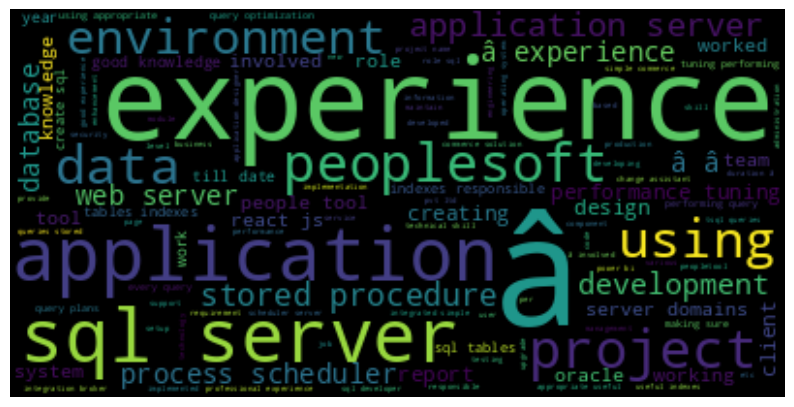

In [89]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [90]:
categories = np.sort(data['Category'].unique())
categories

array(['Peoplesoft', 'React Deveolper', 'SQL Developer Lightning insight',
       'Workday Resumes'], dtype=object)

In [91]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes    Category
 0   anubhav kumar singh core competencies scriptin...  Peoplesoft
 1   profile summary â¢ years of experience in imp...  Peoplesoft
 2   personal details name pritam biswas date of bi...  Peoplesoft
 3   peoplesoft administration vivekanand sayana ca...  Peoplesoft
 4   peoplesoft database administrator gangareddy p...  Peoplesoft
 5   peoplesoft administrator srinivask experience ...  Peoplesoft
 6   rahul ahuja summary â¢ years of experience in...  Peoplesoft
 7   c o n t a c t address manyata tech park nagava...  Peoplesoft
 8   arun venu experience summary â¢ experience of...  Peoplesoft
 9   tanna sujatha objective seeking a challenging ...  Peoplesoft
 10  peoplesoft admin varkala vikas career objectiv...  Peoplesoft
 11  priyabrata hota career objective pursuing peop...  Peoplesoft
 12  hari narayana professional summary having year...  Peoplesoft
 13  murali professional summary having years of ex...  People

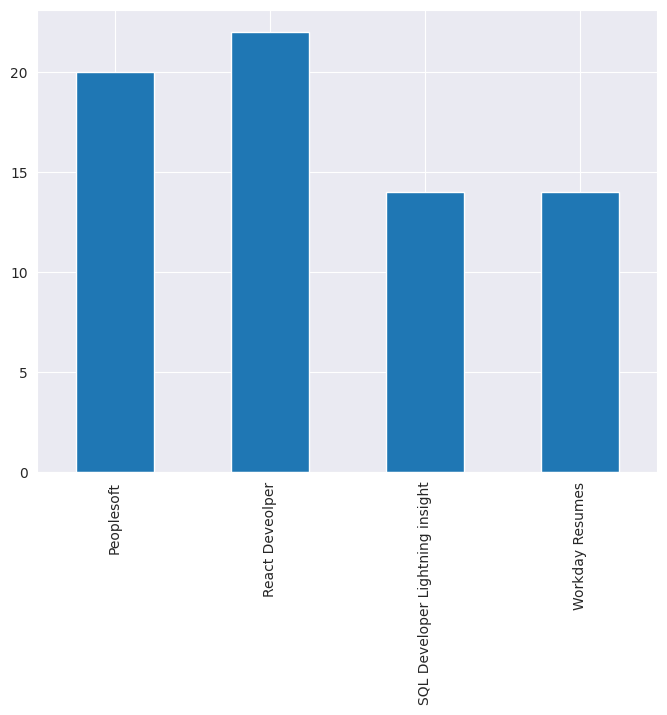

In [92]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.show()

In [93]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

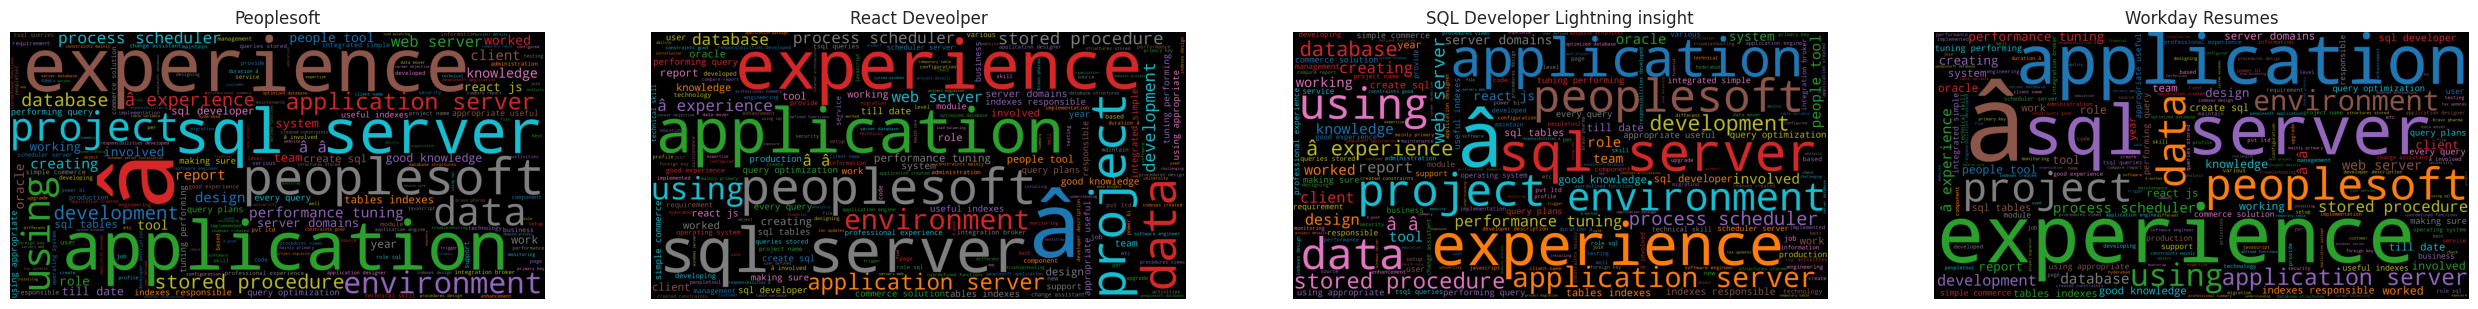

In [94]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [95]:
def wordfreq(df):
    count = data['Absolute_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

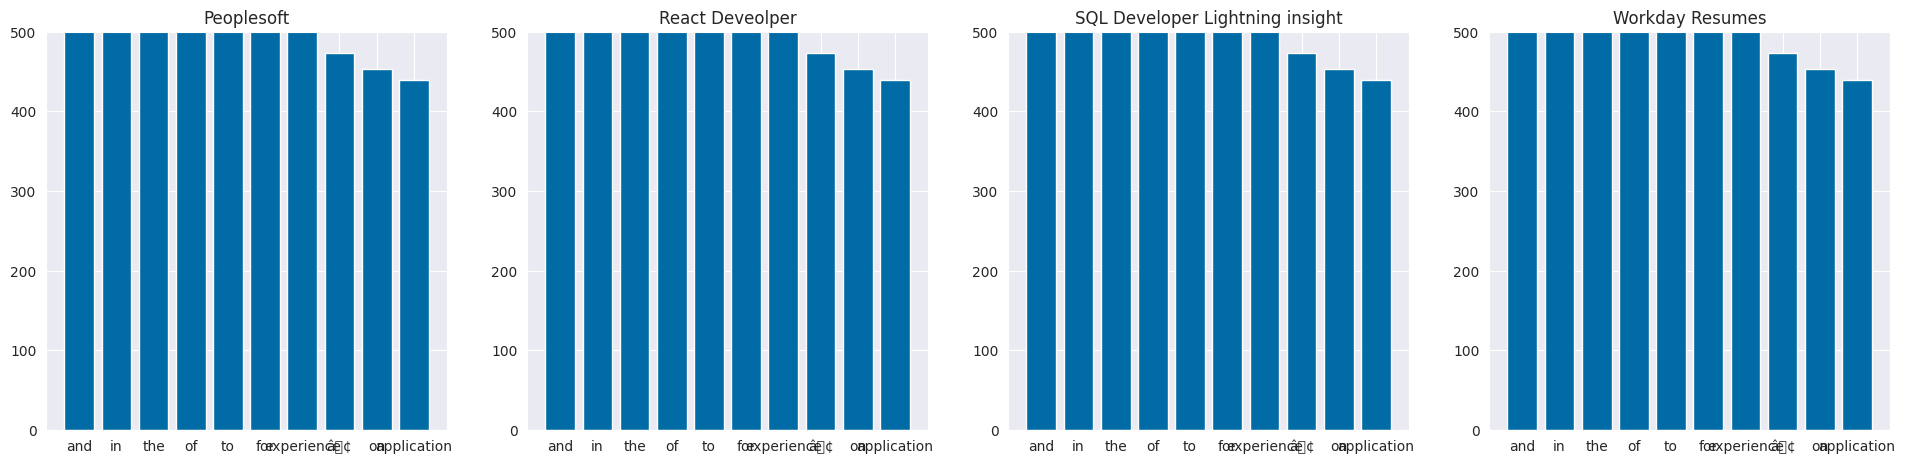

In [96]:
fig = plt.figure(figsize=(30, 30))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [97]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [98]:
data.head(10)

,Category,Absolute_Clean_Resumes
0,0,anubhav kumar singh core competencies scriptin...
1,0,profile summary â¢ years of experience in imp...
2,0,personal details name pritam biswas date of bi...
3,0,peoplesoft administration vivekanand sayana ca...
4,0,peoplesoft database administrator gangareddy p...
5,0,peoplesoft administrator srinivask experience ...
6,0,rahul ahuja summary â¢ years of experience in...
7,0,c o n t a c t address manyata tech park nagava...
8,0,arun venu experience summary â¢ experience of...
9,0,tanna sujatha objective seeking a challenging ...


In [99]:
data.tail(10)

,Category,Absolute_Clean_Resumes
60,3,sql developer name bandi prem sai career objec...
61,3,sql developer name bandi prem sai career objec...
62,3,sql developer name bandi prem sai career objec...
63,3,sql developer name bandi prem sai career objec...
64,3,sql developer name bandi prem sai career objec...
65,3,sql developer name bandi prem sai career objec...
66,3,sql developer name bandi prem sai career objec...
67,3,sql developer name bandi prem sai career objec...
68,3,sql developer name bandi prem sai career objec...
69,3,sql developer name bandi prem sai career objec...


In [100]:
data.Category.value_counts()

1    22
0    20
2    14
3    14
Name: Category, dtype: int64

<Figure size 10000x5000 with 0 Axes>

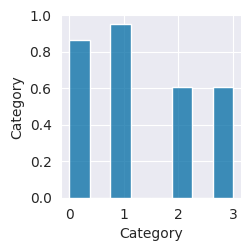

In [101]:
plt.figure(figsize=(20,10),dpi=500)
sns.pairplot(data = data)

<Axes: xlabel='count', ylabel='Category'>

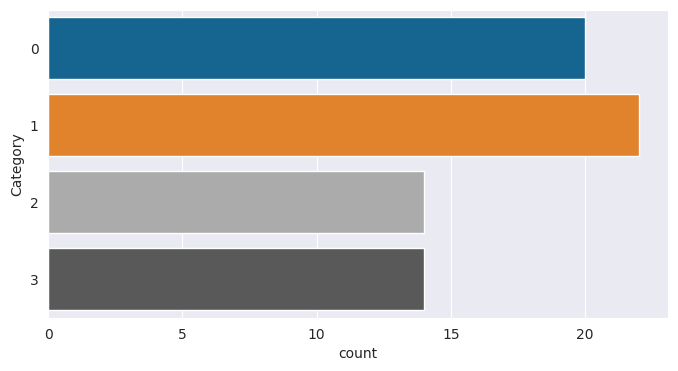

In [102]:
plt.figure(figsize=(8,4))
plt.xticks()
sns.countplot(y="Category", data=data)

In [103]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [104]:
targetCounts

0    22
1    20
2    14
3    14
Name: Category, dtype: int64

In [105]:
targetLabels

0    1
1    0
2    2
3    3
Name: index, dtype: int64

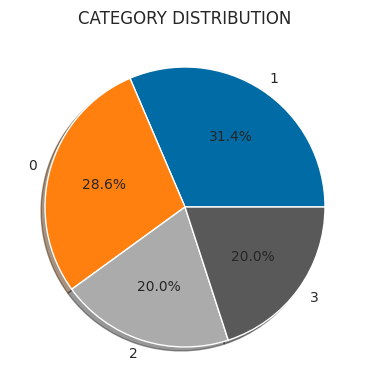

In [106]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(10,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
requiredText = data['Absolute_Clean_Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# Model Building

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((56, 3956), (14, 3956))

In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1) Support Vector Machine Classifier(SVM)

In [111]:
sv = SVC()
sv.fit(X_train,y_train)
predict1 = sv.predict(X_test)

In [112]:
y_train

array([2, 0, 3, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 3, 3, 3, 0, 3, 0, 2, 2, 2,
       1, 3, 3, 1, 3, 3, 1, 1, 2, 0, 0, 0, 2, 0, 3, 0, 3, 2, 2, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2])

In [113]:
predict11= sv.predict(X_train)
accuracy_11 = accuracy_score(y_train,predict11)
accuracy_11        #accuracy of train data


0.9821428571428571

In [114]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1      #accuracy of test data

1.0

In [115]:
cm1 = confusion_matrix(y_test,predict1)
cm1

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

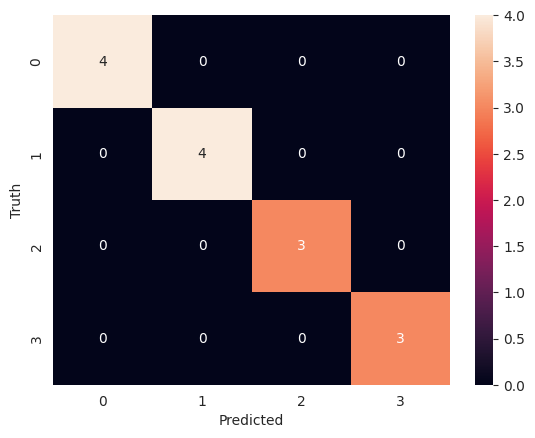

In [116]:
sns.heatmap(cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [117]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [118]:
accuracy_11 = round(accuracy_score(y_train,predict11),4)
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [119]:
print('Train Accuracy Score  : ', accuracy_11)
print('Test Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 2) Random Forest Classifier

In [120]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict2=rf.predict(X_test)

In [121]:
predict22= rf.predict(X_train)
accuracy_22 = accuracy_score(y_train,predict22)
accuracy_22       #accuracy of train data


0.9821428571428571

In [122]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2          #accuracy of test data

1.0

In [123]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

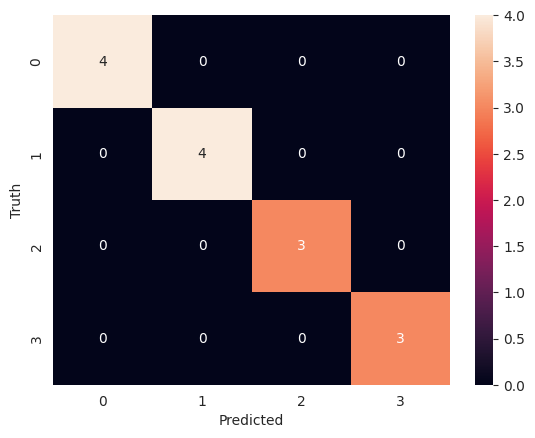

In [124]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [125]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [126]:
accuracy_22 = round(accuracy_score(y_train,predict22),4)
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_22)
print('Test Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 3) K Neighbour Classifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics


kn = OneVsRestClassifier(KNeighborsClassifier())
kn.fit(X_train,y_train)
predict3=kn.predict(X_test)

In [128]:
predict33= kn.predict(X_train)
accuracy_33 = accuracy_score(y_train,predict33)
accuracy_33      #accuracy of train data

0.9464285714285714

In [129]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3         #accuracy of test data

1.0

In [130]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

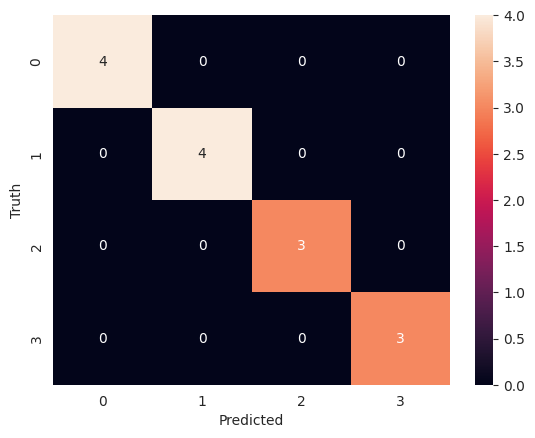

In [131]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [132]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [133]:
accuracy_33 = round(accuracy_score(y_train,predict33),4)
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_33)
print('Test Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Train Accuracy Score  :  0.9464
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 4) Naive-Bayes Classifier

In [134]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [135]:
predict44= nb.predict(X_train)
accuracy_44 = accuracy_score(y_train,predict44)
accuracy_44      #accuracy of train data

0.9821428571428571

In [136]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4    #accuracy of test data

1.0

In [137]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

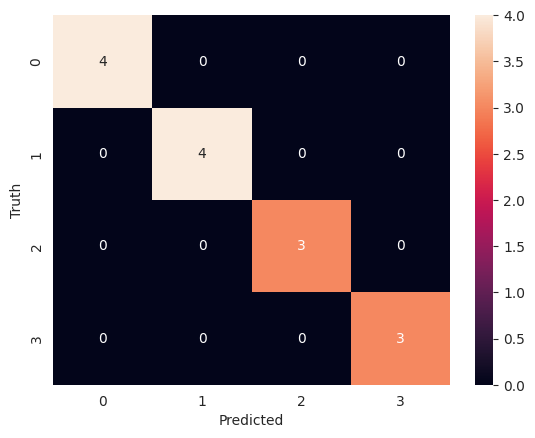

In [138]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [139]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [140]:
accuracy_44 = round(accuracy_score(y_train,predict44),4)
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_44)
print('Test Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 5) Decision Tree Classifier

In [141]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [142]:
predict55= dt.predict(X_train)
accuracy_55 = accuracy_score(y_train,predict55)
accuracy_55     #accuracy of train data

0.9821428571428571

In [143]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5 #accuracy of test data

1.0

In [144]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

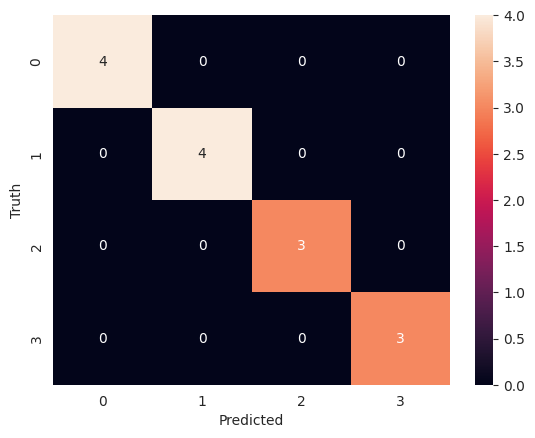

In [145]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [146]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [147]:
accuracy_55 = round( accuracy_score(y_train,predict55),4)
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_55)
print('Test Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 6) AdaBoost Classifier

In [148]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [149]:
predict66= ab.predict(X_train)
accuracy_66 = accuracy_score(y_train,predict66)
accuracy_66    #accuracy of train data

0.8035714285714286

In [150]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6 #accuracy of test data

0.7857142857142857

In [151]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 3, 0]])

Text(50.722222222222214, 0.5, 'Truth')

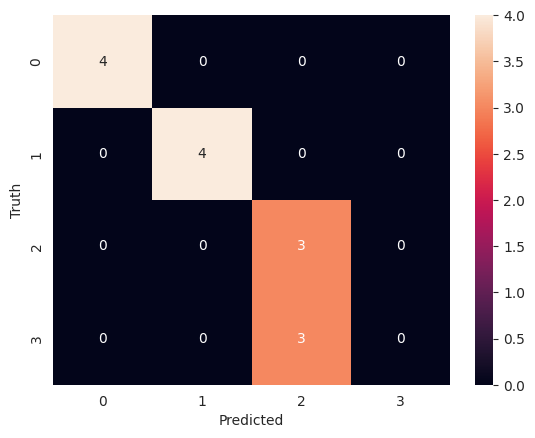

In [152]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [153]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.62      0.75      0.67        14
weighted avg       0.68      0.79      0.71        14



In [154]:
accuracy_66 = round(accuracy_score(y_train,predict66),4)
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_66)
print('Test Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Train Accuracy Score  :  0.8036
Test Accuracy Score  :  0.7857
Precision Score :  0.625
Recall Score    :  0.75
f1-Score        :  0.6667


# 7) GradientBoosting Classifier

In [155]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [156]:
predict77= gd.predict(X_train)
accuracy_77 = accuracy_score(y_train,predict77)
accuracy_77   #accuracy of train data

0.9821428571428571

In [157]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7 #accuracy of test data

1.0

In [158]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

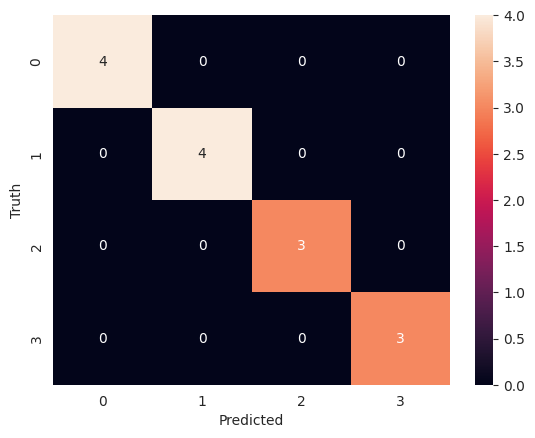

In [159]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [160]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [161]:
accuracy_77 = round(accuracy_score(y_train,predict77),4)
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_77)
print('Test Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 8) XGBoost Classifier

In [162]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [163]:
predict88= xg.predict(X_train)
accuracy_88 = accuracy_score(y_train,predict88)
accuracy_88   #accuracy of train data

0.9821428571428571

In [164]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8#accuracy of test data

1.0

In [165]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

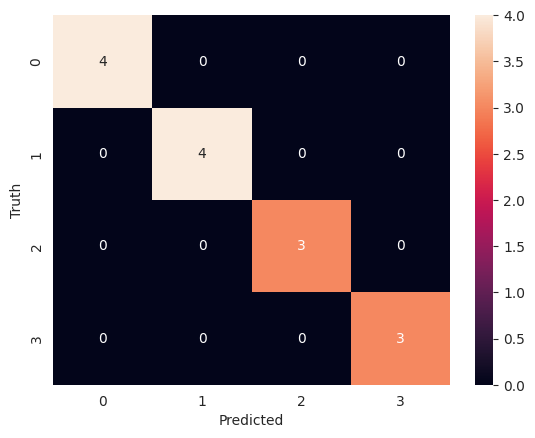

In [166]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [167]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [168]:
accuracy_88 = round(accuracy_score(y_train,predict88),4)
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_88)
print('Test Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 9) LGBM-Boosting Classifier

In [169]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

In [170]:
predict99= lgbm.predict(X_train)
accuracy_99 = accuracy_score(y_train,predict99)
accuracy_99   #accuracy of train data

0.9821428571428571

In [171]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9 #accuracy of test data

1.0

In [172]:
cm9 = confusion_matrix(y_test,predict9)
cm9

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

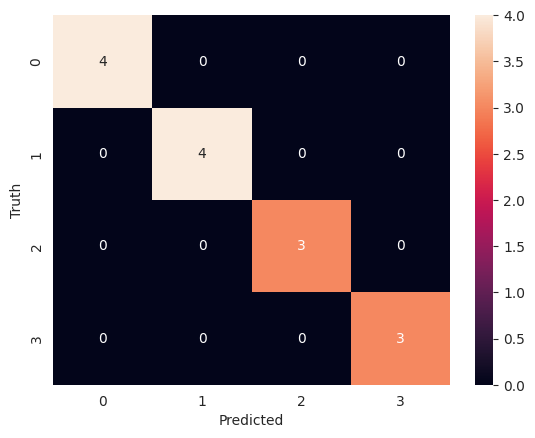

In [173]:
sns.heatmap(cm9,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [174]:
print(classification_report(y_test,predict9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [175]:
accuracy_99 = round(accuracy_score(y_train,predict99),4)
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_99)
print('Test Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# 10) Multinomial Logistic Regression

In [176]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

mlr = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
predict10 = mlr.predict(X_test)

In [177]:
predict100= mlr.predict(X_train)
accuracy_100 = accuracy_score(y_train,predict100)
accuracy_100   #accuracy of train data

0.9821428571428571

In [178]:
accuracy_10 = accuracy_score(y_test,predict10)
accuracy_10 #accuracy of test data

1.0

In [179]:
cm10 = confusion_matrix(y_test,predict10)
cm10

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

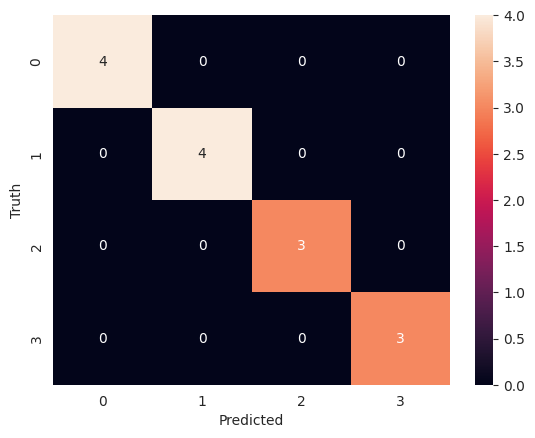

In [180]:
sns.heatmap(cm10,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [181]:
print(classification_report(y_test,predict10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [182]:
accuracy_100 = round(accuracy_score(y_train,predict100),4)
accuracy_10 = round(accuracy_score(y_test,predict10),4)
precision_10 = round(precision_score(y_test,predict10,average = 'macro'),4)
recall_10 = round(recall_score(y_test,predict10, average = 'macro'),4)
f1_10 = round(f1_score(y_test,predict10, average = 'macro'),4)

print('Train Accuracy Score  : ', accuracy_100)
print('Test Accuracy Score  : ', accuracy_10)
print('Precision Score : ', precision_10)
print('Recall Score    : ', recall_10)
print('f1-Score        : ', f1_10)

Train Accuracy Score  :  0.9821
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# Comparing Accuracy By Different Models

In [183]:
table = {'Classifier' : ['SVM Classifier','Random Forest Classifier','K Neighbour Classifier' , 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier','Multinomial Logistic Regression'], 'Train Accuracy' : [accuracy_11, accuracy_22, accuracy_33, accuracy_44, accuracy_55, accuracy_66, accuracy_77, accuracy_88, accuracy_99,accuracy_100],'Test Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9,accuracy_10], 'Precision Score' : [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9, precision_10], 'Recall Score' : [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9, recall_10], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9,f1_10]}
table = pd.DataFrame(table)
table.sort_values(["Test Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1_Score
0,AdaBoost Classifier,0.8036,0.7857,0.625,0.75,0.6667
1,SVM Classifier,0.9821,1.0000,1.000,1.00,1.0000
2,Random Forest Classifier,0.9821,1.0000,1.000,1.00,1.0000
3,K Neighbour Classifier,0.9464,1.0000,1.000,1.00,1.0000
4,Naive-Bayes Classifier,0.9821,1.0000,1.000,1.00,1.0000
5,Decision Tree Classifier,0.9821,1.0000,1.000,1.00,1.0000
6,Gradient Boosting Classifier,0.9821,1.0000,1.000,1.00,1.0000
7,Xtreme Gradient Boosting Classifier,0.9821,1.0000,1.000,1.00,1.0000
8,Light Gradient Boosting Classifier,0.9821,1.0000,1.000,1.00,1.0000
9,Multinomial Logistic Regression,0.9821,1.0000,1.000,1.00,1.0000


In [185]:
import pickle
pickle.dump(dt, open('dt.pkl', 'wb'))
pickle.dump(word_vectorizer, open('word_vectorizer.pkl', 'wb'))
#pickle.dump(final_ratings, open('final_ratings.pkl', 'wb'))
#pickle.dump(books_pivot, open('books_pivot.pkl', 'wb'))
#pickle.dump(popular_book_img, open('popular_book_img.pkl', 'wb'))
#pickle.dump(no_of_times_rated_book_img, open('no_of_times_rated_book_img.pkl', 'wb'))
#pickle.dump(books_with_ratings, open('books_with_ratings.pkl', 'wb'))
#pickle.dump(age_with_books, open('age_with_books.pkl', 'wb'))

We take Dicision Tree as our final model.